In [4]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import joblib

In [5]:

df = pd.read_csv('tyg3.csv')
df.head()

,subject_id,hadm_id,stay_id,intime,age,gender,race,los,diabetes,hypertension,...,has_ercp,has_vasopressin,los_icu,los_hosp,hosp_mortality,icu_mortality,mortality_7d,mortality_28d,mortality_90d,mortality_1y
0,10004606,29242151,30213599,2159-02-20 16:10:03,64,F,WHITE,5.166100,0,1,...,0,0,5.166100,14.130556,0,0,0,0,0,0
1,10006441,24120560,37240744,2174-09-12 16:57:04,51,M,WHITE,0.776481,0,0,...,0,0,0.776481,15.834722,0,0,0,0,0,0
2,10007795,28477357,31921355,2136-04-22 18:01:13,53,F,WHITE,1.050521,0,1,...,0,0,1.050521,21.834722,0,0,0,0,0,0
3,10010888,20162667,33318955,2174-01-09 00:21:00,43,M,WHITE,9.019225,1,0,...,0,0,9.019225,17.736806,0,0,0,0,0,0
4,10012206,23961896,37675714,2127-07-04 02:08:00,45,M,WHITE,0.572477,1,1,...,0,0,0.572477,10.655556,0,0,0,0,0,0


In [6]:
encoder = OrdinalEncoder()
df[['gender', 'race']] = encoder.fit_transform(df[['gender', 'race']])

In [7]:
df.head()

,subject_id,hadm_id,stay_id,intime,age,gender,race,los,diabetes,hypertension,...,has_ercp,has_vasopressin,los_icu,los_hosp,hosp_mortality,icu_mortality,mortality_7d,mortality_28d,mortality_90d,mortality_1y
0,10004606,29242151,30213599,2159-02-20 16:10:03,64,0.0,22.0,5.166100,0,1,...,0,0,5.166100,14.130556,0,0,0,0,0,0
1,10006441,24120560,37240744,2174-09-12 16:57:04,51,1.0,22.0,0.776481,0,0,...,0,0,0.776481,15.834722,0,0,0,0,0,0
2,10007795,28477357,31921355,2136-04-22 18:01:13,53,0.0,22.0,1.050521,0,1,...,0,0,1.050521,21.834722,0,0,0,0,0,0
3,10010888,20162667,33318955,2174-01-09 00:21:00,43,1.0,22.0,9.019225,1,0,...,0,0,9.019225,17.736806,0,0,0,0,0,0
4,10012206,23961896,37675714,2127-07-04 02:08:00,45,1.0,22.0,0.572477,1,1,...,0,0,0.572477,10.655556,0,0,0,0,0,0


In [12]:
[ (col, df[col].isna().sum()) for col in df.columns if df[col].isna().sum() > 0]

[('neutrophils_max', 67), ('neutrophils_min', 67), ('npar', 67)]

In [13]:
[ col for col in df.columns if df[col].isna().sum() > 0]

['neutrophils_max', 'neutrophils_min', 'npar']

In [ ]:
imp = IterativeImputer(max_iter=100)
cols_miss = ['diabetes', 'hypertension', 'wbc', 'rbc', 'rdw', 'hemoglobin',
       'platelets', 'aniongap', 'bicarbonate', 'calcium', 'chloride',
       'potassium', 'creatinine', 'glucose', 'triglycerides', 'alt', 'alp',
       'ast', 'pt', 'ptt', 'inr', 'tyg', 'neutrophils_max', 'neutrophils_min', 'npar']
df[cols_miss] = imp.fit_transform(df[cols_miss])

In [27]:
df.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'age', 'gender', 'race',
       'los', 'diabetes', 'hypertension', 'wbc', 'rbc', 'rdw', 'hemoglobin',
       'platelets', 'aniongap', 'bicarbonate', 'calcium', 'chloride',
       'potassium', 'creatinine', 'glucose', 'triglycerides', 'alt', 'alp',
       'ast', 'pt', 'ptt', 'inr', 'neutrophils_max', 'neutrophils_min',
       'albumin_max', 'albumin_min', 'bun_max', 'bun_min', 'sepsis',
       'sepsis_3', 'npar', 'tyg', 'sofa', 'has_sepsis', 'aki',
       'has_chronic_kidney_disease', 'has_crrt', 'has_mv', 'has_ercp',
       'has_vasopressin', 'los_icu', 'los_hosp', 'hosp_mortality',
       'icu_mortality', 'mortality_7d', 'mortality_28d', 'mortality_90d',
       'mortality_1y'],
      dtype='object')

In [28]:
cols = [
    'age', 'gender', 'race',
       'los', 'diabetes', 'hypertension', 'wbc', 'rbc', 'rdw', 'hemoglobin',
       'platelets', 'aniongap', 'bicarbonate', 'calcium', 'chloride',
       'potassium', 'creatinine', 'glucose', 'triglycerides', 'alt', 'alp',
       'ast', 'pt', 'ptt', 'inr', 'neutrophils_max', 'neutrophils_min',
       'albumin_max', 'albumin_min', 'bun_max', 'bun_min', 'sepsis',
       'sepsis_3', 'npar', 'tyg', 'sofa', 'has_sepsis', 'aki',
       'has_chronic_kidney_disease', 'has_crrt', 'has_mv', 'has_ercp',
       'has_vasopressin', 'los_icu', 'los_hosp'
]
X, y = df[cols], df['mortality_28d']

In [29]:
X_train, X_test, y_train, y_test, = train_test_split(X, y)

In [30]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
adb.score(X_train, y_train), adb.score(X_test, y_test)

(0.9517102615694165, 0.8795180722891566)

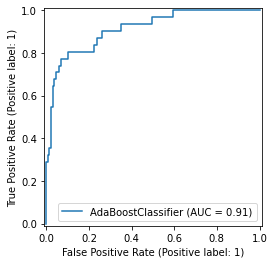

In [31]:
RocCurveDisplay.from_estimator(estimator=adb, X = X_test, y = y_test)
plt.show()

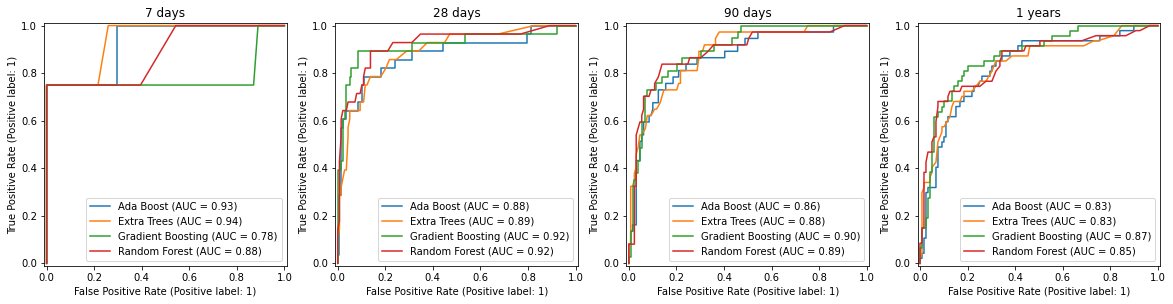

In [32]:
models = {
    'Ada Boost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier()
}

mortalities = ['mortality_7d', 'mortality_28d', 'mortality_90d', 'mortality_1y']
X, Y = df[cols], df[mortalities]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2026)
titles = ['7 days', '28 days', '90 days', '1 years']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))
for i in range(len(mortalities)):
    y_train, y_test = Y_train[mortalities[i]], Y_test[mortalities[i]]
    for name in models:
        model = models[name]
        model.fit(X_train, y_train)
        RocCurveDisplay.from_estimator(estimator=model, X=X_test, y=y_test, ax=axes[i], name=name)
    axes[i].set_title(titles[i])
plt.show()


In [22]:
X_test.to_csv('X_test.csv',index=None )
Y_test.to_csv('Y_test.csv',index=None )

In [23]:
for name in models:
    model = models[name]
    joblib.dump(model, f'{name.replace(" ", "")}.joblib')
